<a href="https://colab.research.google.com/github/kayal466/Task-7-DW-26/blob/main/Logistic_Regression_Assignment12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [ ]:
df=pd.read_csv("/content/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Splitting the dataset into the Training set and Test set**

In [ ]:
df["Gender"]=df["Gender"].map({"Male":0,"Female":1})
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [ ]:
df.drop( "User ID",axis=1,inplace =True)
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [ ]:
dx=df.iloc[:,:3]
dx

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


In [ ]:
x=dx 
y=df["Purchased"]

In [ ]:
x

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((320, 3), (320,), (80, 3), (80,))

**Feature Scaling**

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))

In [ ]:
x1=min_max_scaler.fit_transform(x)

In [ ]:
x1

array([[0.        , 0.02380952, 0.02962963],
       [0.        , 0.4047619 , 0.03703704],
       [1.        , 0.19047619, 0.20740741],
       ...,
       [1.        , 0.76190476, 0.03703704],
       [0.        , 0.42857143, 0.13333333],
       [1.        , 0.73809524, 0.15555556]])

In [ ]:
standardisation=preprocessing.StandardScaler()

In [ ]:
x2=standardisation.fit_transform(x)

In [ ]:
x2

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [ ]:
import statsmodels.api as sm

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()
logistic_fit=model.fit(x_train,y_train)

In [ ]:
prediction=logistic_fit.predict(x_test)
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [ ]:
print(model.score(x_test,y_test))

0.6875


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        55
           1       0.00      0.00      0.00        25

    accuracy                           0.69        80
   macro avg       0.34      0.50      0.41        80
weighted avg       0.47      0.69      0.56        80



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
x=sm.add_constant(x1)

In [ ]:
reg_log_model=sm.Logit(y,x)
result_log=reg_log_model.fit()
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Sat, 03 Dec 2022   Pseudo R-squ.:                  0.4711
Time:                        15:44:51   Log-Likelihood:                -137.92
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 5.488e-53
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.6377      0.804     -9.501      0.000      -9.213      -6.062
x1            -0.3338      0.305     -1.094      0.274      -0.932       0.264
x2             9.9527      1.108      8.984      0.000       7.781      12.124
x3             4.9196      0.739      6.659      0.000       3.471       6.368
==============================================================================
"""

In [ ]:
result_log.predict()

array([7.06140800e-04, 3.14610656e-02, 6.33406707e-03, 1.32775722e-02,
       5.60853359e-03, 1.91141370e-02, 3.47435349e-02, 5.66003857e-01,
       4.85443431e-03, 1.07069773e-01, 2.39596097e-02, 8.77106039e-03,
       1.01864281e-02, 1.46172401e-02, 5.50726906e-03, 6.52298859e-02,
       4.01024265e-01, 3.01809332e-01, 3.70786318e-01, 4.12822757e-01,
       2.72007417e-01, 5.34830005e-01, 6.03203076e-01, 2.11100450e-01,
       3.29366664e-01, 3.58149456e-01, 5.45390494e-01, 3.65206549e-01,
       1.77980692e-02, 1.15689066e-02, 8.26335502e-02, 1.98926510e-01,
       7.28191765e-04, 1.05077533e-02, 5.88611284e-02, 4.02350625e-02,
       1.90157172e-02, 2.77847372e-02, 1.80098224e-02, 5.19017892e-03,
       3.12260537e-03, 4.28956007e-02, 4.45168115e-01, 8.21055044e-03,
       4.36287047e-02, 1.88739087e-03, 2.54142693e-02, 1.19189397e-02,
       3.96242071e-01, 1.00262007e-01, 2.65077106e-03, 9.92022211e-04,
       5.28048194e-02, 2.52942698e-02, 1.37635645e-02, 6.10755148e-03,
      

**Step 3 | Predection**

In [ ]:
result_log.pred_table()

array([[237.,  20.],
       [ 39., 104.]])

In [ ]:
(237+104)/(237+20+39+104)

0.8525

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [ ]:
cm_df=pd.DataFrame(result_log.pred_table())
cm_df.columns=["predicted 0","predicted 1"]
cm_df=cm_df.rename(index={0:"actual 0",1:"actual 1"})
cm_df

,predicted 0,predicted 1
actual 0,237.0,20.0
actual 1,39.0,104.0


In [ ]:
cm=np.array(cm_df)
accuracy_training=100*(cm[0,0]+cm[1,1])/cm.sum()
accuracy_training

85.25

**Visualization**

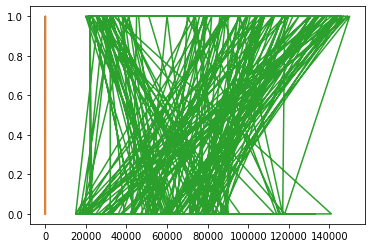

In [ ]:
import matplotlib.pyplot as plt  
plt.plot(x_train,y_train)
plt.show()

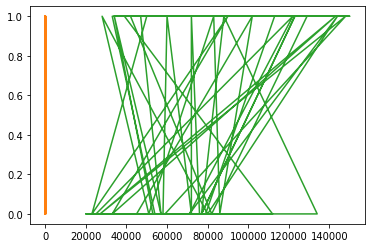

In [ ]:
import matplotlib.pyplot as plt  
plt.plot(x_test,y_test)
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
fig=px.histogram(x=df["Age"],nbins=25,color=df["EstimatedSalary"])
fig.show()

In [ ]:
fig=px.scatter_3d(df,x="Gender",y="Age",z="EstimatedSalary",color="Purchased")
fig.show()